In [40]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
import pydot
from io import StringIO
from sklearn.tree import export_graphviz
#from dm_tools import data_prep
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from collections import Counter
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import ClusterCentroids
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [5]:
df = pd.read_csv(r'C:\Users\n10180893\Downloads\FinalData.txt',names=['Subject','Object','Predicate','Factorise','Target','Yp'])
df = df.drop(index=0)

X = df[['Subject','Object','Predicate','Yp']]
y = df.Target

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_sample(X, y)

Y_res_ALS = y_res.astype(float)

Y_pred_ALS = X_res[:,3]

              precision    recall  f1-score   support

         0.0       1.00      0.88      0.94     11986
         1.0       0.89      1.00      0.94     11986

   micro avg       0.94      0.94      0.94     23972
   macro avg       0.95      0.94      0.94     23972
weighted avg       0.95      0.94      0.94     23972

ROC index on CP ALS: 0.9398882029033873


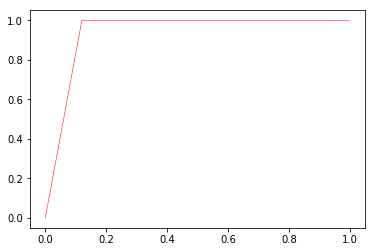

In [54]:
print(classification_report(Y_res_ALS, Y_pred_ALS))

roc_index_als = roc_auc_score(Y_res_ALS, Y_pred_ALS)


print("ROC index on CP ALS:", roc_index_dt)

import matplotlib.pyplot as plt
fpr_als, tpr_als, thresholds_als = roc_curve(Y_res_ALS, Y_pred_ALS)
plt.plot(fpr_als, tpr_als, label='ROC Curve for LR {:.3f}'.format(roc_index_als), color='red', lw=0.5)


Train accuracy: 0.5612038140643624
Test accuracy: 0.5599276974416018
              precision    recall  f1-score   support

           0       0.56      0.55      0.55      3596
           1       0.56      0.57      0.57      3596

   micro avg       0.56      0.56      0.56      7192
   macro avg       0.56      0.56      0.56      7192
weighted avg       0.56      0.56      0.56      7192

{'C': 0.001}
ROC index on Logistic Regression 0.5599276974416019


C:\Users\n10180893\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


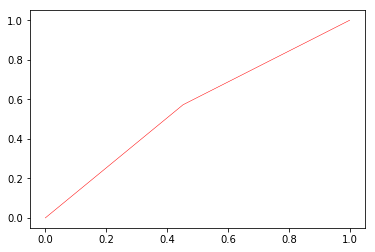

In [47]:
df = pd.read_csv(r'C:\Users\n10180893\Downloads\data.txt',names=['s','p','o','f','t','f1'])
df = df.drop(index=0)

X = df[['s','p','o']]
y = df.t
rs=10
#Split the data based on training and testing with 70 and 30%

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_sample(X, y)

X_train_LR, X_test_LR, y_train_LR, y_test_LR = train_test_split(X_res, y_res, test_size=0.3, stratify=y_res, random_state=rs)

# grid search CV
params = {'C': [pow(10, x) for x in range(-6, 4)]}

# use all cores to tune logistic regression with C parameter
cv = GridSearchCV(param_grid=params, estimator=LogisticRegression(random_state=rs), cv=10, n_jobs=-1)
cv.fit(X_train_LR, y_train_LR)

# test the best model
print("Train accuracy:", cv.score(X_train_LR, y_train_LR))
print("Test accuracy:", cv.score(X_test_LR, y_test_LR))

y_pred_LR = cv.predict(X_test_LR)
print(classification_report(y_test_LR, y_pred_LR))

# print parameters of the best model
print(cv.best_params_)

y_test_LR = y_test_LR.astype(float)
y_pred_LR = y_pred_LR.astype(float)

roc_index_LR = roc_auc_score(y_test_LR, y_pred_LR)

print("ROC index on Logistic Regression", roc_index_LR)
fpr_LR, tpr_LR, thresholds_LR = roc_curve(y_test_LR, y_pred_LR)
plt.plot(fpr_LR, tpr_LR, label='ROC Curve for LR {:.3f}'.format(roc_index_LR), color='red', lw=0.5)

Train accuracy: 0.5612038140643624
Test accuracy: 0.5599276974416018
              precision    recall  f1-score   support

           0       0.56      0.55      0.55      3596
           1       0.56      0.57      0.57      3596

   micro avg       0.56      0.56      0.56      7192
   macro avg       0.56      0.56      0.56      7192
weighted avg       0.56      0.56      0.56      7192

{'C': 0.001}
ROC index on Decision Tree: 0.5599276974416019
Number of nodes:  311


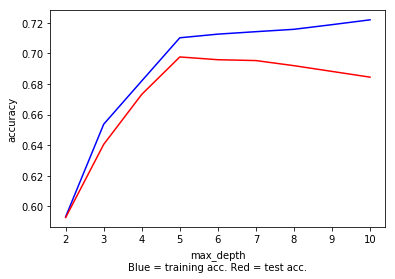

In [59]:
df = pd.read_csv(r'C:\Users\n10180893\Downloads\data.txt',names=['s','p','o','f','t','f1'])
df = df.drop(index=0)

X = df[['s','p','o']]
y = df.t
rs=10
#Split the data based on training and testing with 70 and 30%

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_sample(X, y)

X_train_DT, X_test_DT, y_train_DT, y_test_DT = train_test_split(X_res, y_res, test_size=0.3, stratify=y_res, random_state=rs)

params = {'criterion': ['gini', 'entropy'],
          'max_depth': range(2, 30,5),
          'min_samples_leaf': range(10,40, 5)}

cv_dt = GridSearchCV(param_grid=params, estimator=DecisionTreeClassifier(random_state=rs), cv=10)
cv_dt.fit(X_train_DT, y_train_DT)

print("Train accuracy:", cv.score(X_train_DT, y_train_DT))
print("Test accuracy:", cv.score(X_test_DT, y_test_DT))

# test the best model
y_pred_DT = cv.predict(X_test_DT)
print(classification_report(y_test_DT, y_pred_DT))

# print parameters of the best model
print(cv.best_params_)

y_test_DT = y_test_DT.astype(float)
y_pred_DT = y_pred_DT.astype(float)
y_train_DT = y_train_DT.astype(float)

roc_index_DT = roc_auc_score(y_test_DT, y_pred_DT)

print("ROC index on Decision Tree:", roc_index_DT)


test_score = []
train_score = []

# check the model performance for max depth from 2-20
for max_depth in range(2, 11):
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=rs)
    model.fit(X_train_DT, y_train_DT)
    test_score.append(model.score(X_test_DT, y_test_DT))
    train_score.append(model.score(X_train_DT, y_train_DT))
    
# plot max depth hyperparameter values vs training and test accuracy score
print("Number of nodes: ",model.tree_.node_count)
plt.plot(range(2, 11), train_score, 'b', range(2,11), test_score, 'r')
plt.xlabel('max_depth\nBlue = training acc. Red = test acc.')
plt.ylabel('accuracy')
plt.show()

ROC index on Decision Tree: 0.6942436040044493
ROC index on Logistic Regression 0.5599276974416019


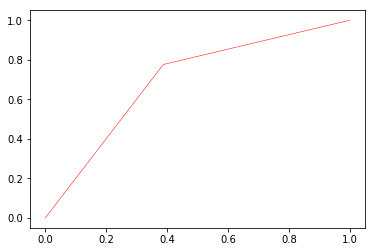

In [53]:
print("ROC index on Decision Tree:", roc_index_DT)
print("ROC index on Logistic Regression", roc_index_LR)
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test_DT, y_pred_DT)
plt.plot(fpr_dt, tpr_dt, label='ROC Curve for LR {:.3f}'.format(roc_index_DT), color='red', lw=0.5)

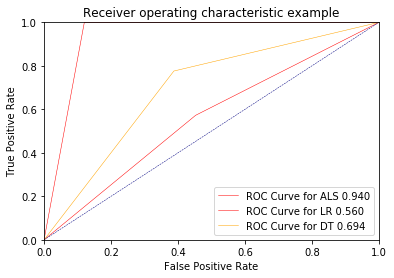

In [56]:
plt.plot(fpr_als, tpr_als, label='ROC Curve for ALS {:.3f}'.format(roc_index_als), color='red', lw=0.5)
plt.plot(fpr_LR, tpr_LR, label='ROC Curve for LR {:.3f}'.format(roc_index_LR), color='red', lw=0.5)
plt.plot(fpr_dt, tpr_dt, label='ROC Curve for DT {:.3f}'.format(roc_index_DT), color='orange', lw=0.5)
plt.plot([0, 1], [0, 1], color='navy', lw=0.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [60]:
from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators=[('LR', cv), ('DT', cv_dt)], voting='soft')

In [66]:
# fit the voting classifier to training data
voting.fit(X_res, y_res)

# evaluate train and test accuracy
print("Ensemble train accuracy:", voting.score(X_train, y_train))
print("Ensemble test accuracy:", voting.score(X_test, y_test))

# evaluate ROC auc score
y_pred_proba_ensemble = voting.predict_proba(X_test)
roc_index_ensemble = roc_auc_score(y_test, y_pred_proba_ensemble[:, 1])
print("ROC score of voting classifier:", roc_index_ensemble)



C:\Users\n10180893\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Ensemble train accuracy: 0.7106078665077473
Ensemble test accuracy: 0.6995272525027809
ROC score of voting classifier: 0.7711787507068167
